In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('C:/User/kgonzales21/Downloads/IE things/Datasets/Fashion Dataset.csv')
data.head()

,Index,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [244]:
print("---Column names---")
print("")
print(data.columns)
print("")
print("---Info---")
print("")
print(data.info())
print("")
print("---Data Shape---")
print("")
print(data.shape)

---Column names---

Index(['Index', 'BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice',
       'Discount', 'Category'],
      dtype='object')

---Info---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30758 entries, 0 to 30757
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      30758 non-null  int64 
 1   BrandName  30758 non-null  object
 2   Deatils    30758 non-null  object
 3   Sizes      30758 non-null  object
 4   MRP        30758 non-null  object
 5   SellPrice  30758 non-null  object
 6   Discount   30758 non-null  object
 7   Category   30758 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.9+ MB
None

---Data Shape---

(30758, 8)


In [246]:
data_mod = data.drop(columns=['Index'])
data_mod.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women


In [247]:
list_data = list(data_mod.columns.values) #alternative

for n in list_data: #or list_cata_cat_cols
    attributes = data[n].value_counts()
    print("----" , n, "----")
    print()
    print(attributes)
    print() #all columns

---- BrandName ----

vastranand     1543
Nan            1183
zink london     918
global desi     889
stop            884
               ... 
nachtmann         1
v canto           1
clarins           1
gas               1
accessorize       1
Name: BrandName, Length: 275, dtype: int64

---- Deatils ----

Nan                                                                                     1183
kanchipuram weave zari border and rich zari pallu with contrast blouse piece - multi      42
synthetic womens casual sandals - black                                                   38
solid zari cotton blend festive wear womens regular saree - cream                         34
alloy metal gold color western womens earrings                                            30
                                                                                        ... 
printed round neck georgette womens regular top - blue                                     1
geometric collar neck wool blend womens pullo

In [248]:
list(set(data_mod.dtypes.tolist()))

[dtype('O')]

In [249]:
data_mod.isnull().values.any()

False

In [286]:
list_Nan_count = []
for i in list_data:
    Nan = data_mod[i].loc[data_mod[i]== "Nan"].any()
    print(i, "---", Nan)
    Nan_count = data_mod[i].loc[data_mod[i]== "Nan"].count()
    list_Nan_count.append(Nan_count)
Nan_Series = pd.Series(data=list_Nan_count, index=[list_data])
Nan_Series.sort_values(ascending=False)

BrandName --- True
Deatils --- True
Sizes --- True
MRP --- True
SellPrice --- True
Discount --- True
Category --- False


MRP          8208
Discount     8208
Sizes        7501
BrandName    1183
Deatils      1183
SellPrice    1183
Category        0
dtype: int64

In [292]:
ind = data_mod.loc[data_mod['Discount'].str.contains("Nan") | data_mod['Sizes'].str.contains("Nan")].index
data_mod1 = data_mod.drop(ind)
data_mod1

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849,50% off,Westernwear-Women
...,...,...,...,...,...,...,...
26673,lemon & pepper,womens casual wear buckle closure flats - navy,"Size:36,37,38,39,40",Rs\n2999,1499,50% off,Footwear-Women
26674,haute curry,womens casual wear slip on heels - black,"Size:36,37,38,39,40",Rs\n2199,1099,50% off,Footwear-Women
26885,swiss eagle,womens analogue metallic watch,Size:Error Size,Rs\n13990,4197,70% off,Watches-Women
27290,lawman watches,womens rose gold dial stainless steel analogue...,Size:Error Size,Rs\n7499,4999,33% off,Watches-Women


In [293]:
for i in list_data:
    Nan = data_mod1[i].loc[data_mod1[i]== "Nan"].any()
    print(i, "---", Nan)

BrandName --- False
Deatils --- False
Sizes --- False
MRP --- False
SellPrice --- False
Discount --- False
Category --- False


In [294]:
data_category_values = pd.DataFrame(data_mod1['Category'].value_counts())
data_category_percent = pd.DataFrame(data_mod1['Category'].value_counts(normalize=True)*100)
data_category = pd.concat([data_category_values, data_category_percent], axis=1)
sample = data_category.rename(columns={'Category': 'Count', 'Category': 'Percent'})
sample

,Percent,Percent
Westernwear-Women,8221,44.742571
Indianwear-Women,6428,34.984217
Lingerie&Nightwear-Women,2084,11.342114
Footwear-Women,1638,8.914771
Watches-Women,3,0.016327


C:\Users\Randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

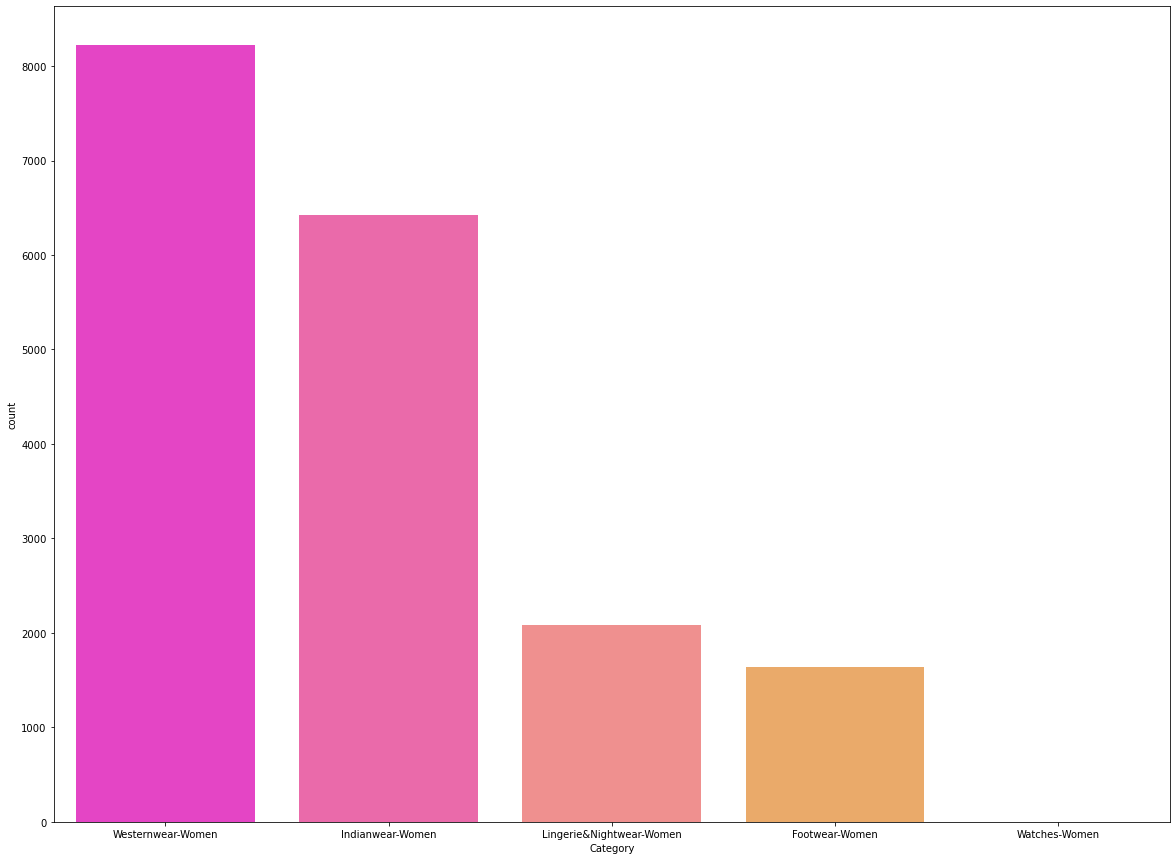

In [295]:
plt.figure(figsize=(20,15))
sns.countplot('Category',data=data_mod1 ,palette='spring')

In [296]:
data_mod1['SellPrice'] = data_mod1['SellPrice'].astype(float)
data_mod1.head()

,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849.0,50% off,Westernwear-Women
1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449.0,30% off,Westernwear-Women
2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599.0,50% off,Westernwear-Women
3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379.0,40% off,Westernwear-Women
4,life,regular fit regular length denim womens jeans ...,"Size:26,28,30,32,34,36",Rs\n1699,849.0,50% off,Westernwear-Women


C:\Users\Randy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='SellPrice'>

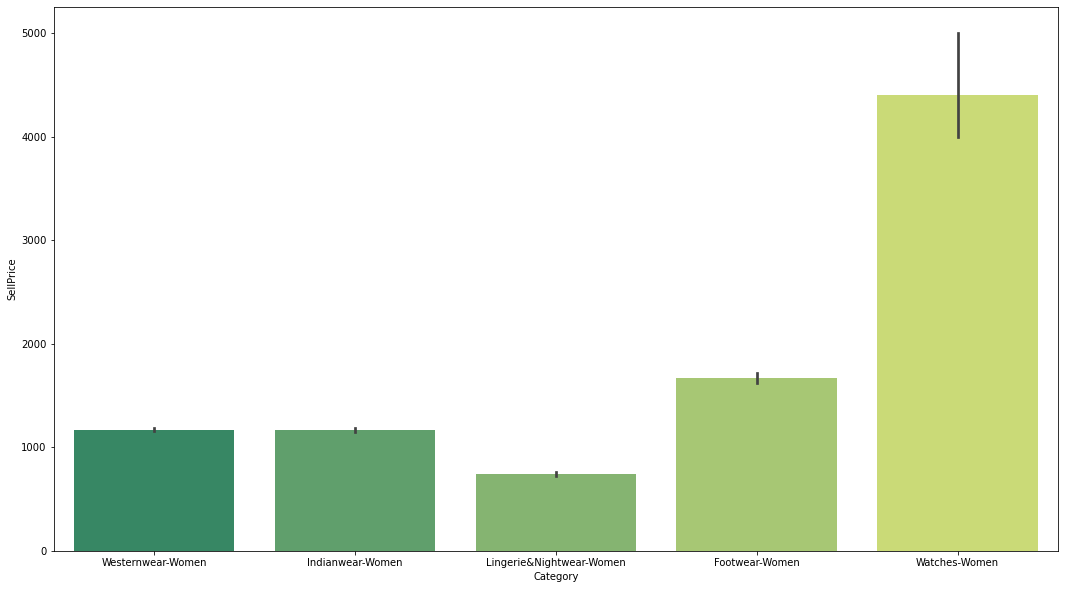

In [297]:
plt.figure(figsize=(18,10))
sns.barplot('Category','SellPrice',data=data_mod1,palette='summer')

In [299]:
data_mod1['Discount'].value_counts()

50% off    6718
30% off    2400
60% off    2220
40% off    1914
20% off    1497
           ... 
79% off       1
66% off       1
77% off       1
27% off       1
36% off       1
Name: Discount, Length: 64, dtype: int64

In [300]:
data_mod1['Deatils'].value_counts()

synthetic womens casual sandals - black                           36
printed cotton round neck womens t-shirt - white                  18
synthetic womens casual sandals - pink                            17
printed cotton round neck womens t-shirt - black                  16
synthetic womens casual sandals - grey                            15
                                                                  ..
solid polyester blend contemporary fit womens trousers - olive     1
womens round neck floral print tunic - yellow                      1
womens regular fit i am just a girl denim top blue - blue          1
skinny fit cropped cotton blend womens jeans - black               1
womens silver dial stainless steel analogue watch - lwwi105a       1
Name: Deatils, Length: 15456, dtype: int64